In [5]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline


In [6]:

diabetes = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
# print(diabetes['Diabetes_012'].value_counts())
diabetes['Diabetes_012'] = diabetes['Diabetes_012'].replace(2, 1)
diabetes.head()
# print(diabetes['Diabetes_012'].value_counts())


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [7]:

x_train, x_test = train_test_split(diabetes, test_size=0.20, random_state=42)
x_test,y_test = x_test.drop(['Diabetes_012'],axis=1),x_test['Diabetes_012']

# x_train, x_val = train_test_split(x_train, test_size=0.20, random_state=42)

x_train,y_train = x_train.drop(['Diabetes_012'],axis=1),x_train['Diabetes_012']
# x_val,y_val = x_val.drop(['Diabetes_012'],axis=1),x_val['Diabetes_012']


In [ ]:

# logistic = Pipeline([
#     ('scaler', StandardScaler()),
#     ('model', LogisticRegression())
# ])

# param_grid = [
#     {
#         'model__penalty': ['l1', 'l2'],
#         'model__C': [0.0001,0.001, 0.01, 0.1, 1.0, 10.0],
#         'model__solver': ['liblinear', 'saga']
#     },
#     {
#         'model__penalty': ['l2', 'l1'],
#         'model__C': [0.0001,0.001,0.01, 0.1, 1.0, 10.0],
#         'model__class_weight': ['balanced'],
#         'model__solver': ['liblinear', 'saga']
#     }
# ]

# # Grid search
# grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(x_train, y_train)

# print("Best params:", grid_search.best_params_)
# print("Best estimator:", grid_search.best_estimator_)
# print("Best score:", grid_search.best_score_)

Training Accuracy: 84.75%
Test Accuracy: 84.93%


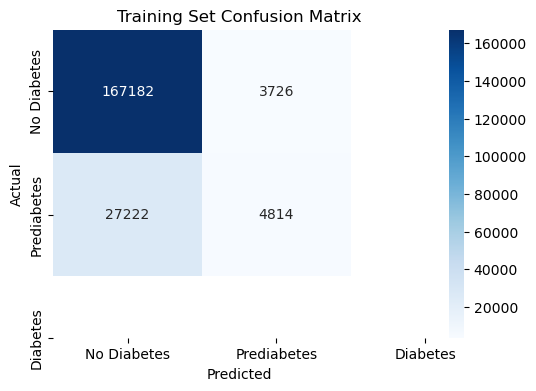

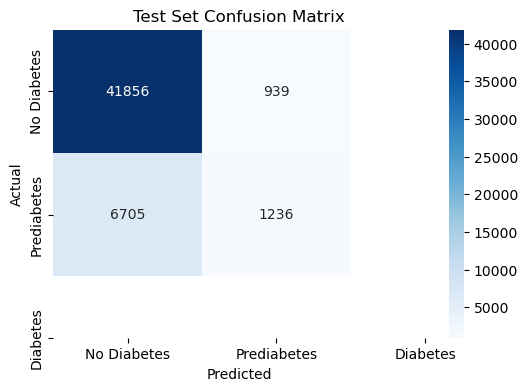


Classification Report (Test Set):


ValueError: Number of classes, 2, does not match size of target_names, 3. Try specifying the labels parameter

In [8]:
model_all_features = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(C=0.001, penalty='l1', solver='saga'))
])

model_all_features.fit(x_train, y_train)

y_train_pred = model_all_features.predict(x_train)
y_test_pred = model_all_features.predict(x_test)

train_accuracy = accuracy_score(y_train, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(y_train, y_train_pred, "Training Set Confusion Matrix")
plot_confusion_matrix(y_test, y_test_pred, "Test Set Confusion Matrix")

# Bonus: Classification report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred,target_names=['No Diabetes', 'Prediabetes', 'Diabetes']))

In [9]:
print("Training set distribution:\n", y_train.value_counts())
print("\nTest set distribution:\n", y_test.value_counts())
from collections import Counter
print( Counter(y_test_pred))
print( Counter(y_train_pred))

Training set distribution:
 Diabetes_012
0.0    170908
1.0     32036
Name: count, dtype: int64

Test set distribution:
 Diabetes_012
0.0    42795
1.0     7941
Name: count, dtype: int64
Counter({np.float64(0.0): 48561, np.float64(1.0): 2175})
Counter({np.float64(0.0): 194404, np.float64(1.0): 8540})


In [7]:

selector = SelectKBest(f_classif, k=10) 
X_new = selector.fit_transform(x_train, y_train)

selected_features = x_train.columns[selector.get_support()]
print("Best features:", selected_features)

Best features: Index(['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth',
       'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income'],
      dtype='object')


In [ ]:
X_train_selected = selector.transform(x_train)
X_test_selected = selector.transform(x_test)

model_selected_features = LogisticRegression(random_state=42, penalty='l1', C=0.01, solver='saga')
model_selected_features.fit(X_train_selected, y_train)

# Get predictions
y_train_pred = model_selected_features.predict(X_train_selected)
y_test_pred = model_selected_features.predict(X_test_selected)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

# Print results
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

c:\Users\LENOVE\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training Accuracy: 84.57%


NameError: name 'val_accuracy' is not defined